In [3]:
import pandas as pd 
import dataparser 
import numpy as np

pd.set_option('display.max_columns', None)
data=pd.read_csv('_data.csv', index_col=1)

#если цена не в рублях то выбрасываем, цены на доллар и евро сильно меняются, непонятно какая цена в рублях (там всего 27 вариантов)
data=data[data['Цена'].str.contains('руб.')].reset_index()

#убираем всех не из Москвы
data=data[data['Адрес'].str.contains('Москва')].reset_index()

#заполняем пустые места для количества комнат, так как это студии, 1 комната
#фича "Тип" у всех одинаковая, дропаем
data=data.fillna({'Количество комнат':1})\
        .drop('Тип',axis=1)

In [ ]:
def get_col_room(data):
    return data['Количество комнат'].astype(str).apply(lambda x: int(x[0]))

def get_price(data):
    return data['Цена'].astype(str).apply(lambda x: float(dataparser.splbac(x,'руб./')[0]))

def get_area_lamb(s):
    if '/'in s:
        return float(dataparser.splbac(s,'/')[0])
    else:
        return float(s)

def get_area(data):
    return data['Площадь, м2'].astype(str).apply(get_area_lamb)

def get_metro(data):
    return data['Метро'].astype(str).apply(lambda x: dataparser.splfb(x,))

def get_ceiling_height(data):
    return data['Высота потолков, м'].astype(str).apply(lambda x: float(x.split()[0]))

cdata=pd.DataFrame()
cdata['col_rooms']=get_col_room(data)
cdata['price']=get_price(data)
cdata['full_area']=get_area(data)
cdata['ceiling_height']=get_ceiling_height(data)
cdata


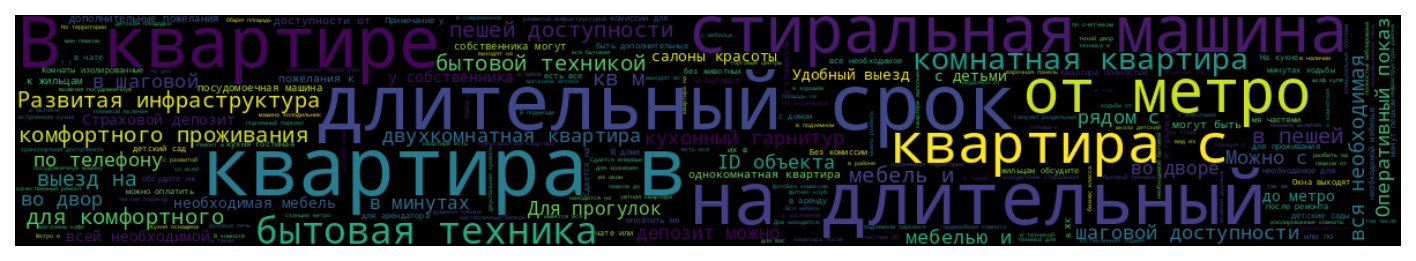

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text):
    # Генерация облака слов
    wordcloud = WordCloud(width=1200, height=200, random_state=21, max_font_size=70).generate(text)

    # Визуализация облака слов
    plt.figure(figsize=(12, 2),dpi=150)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Пример использования

generate_wordcloud(''.join(data['Описание']))

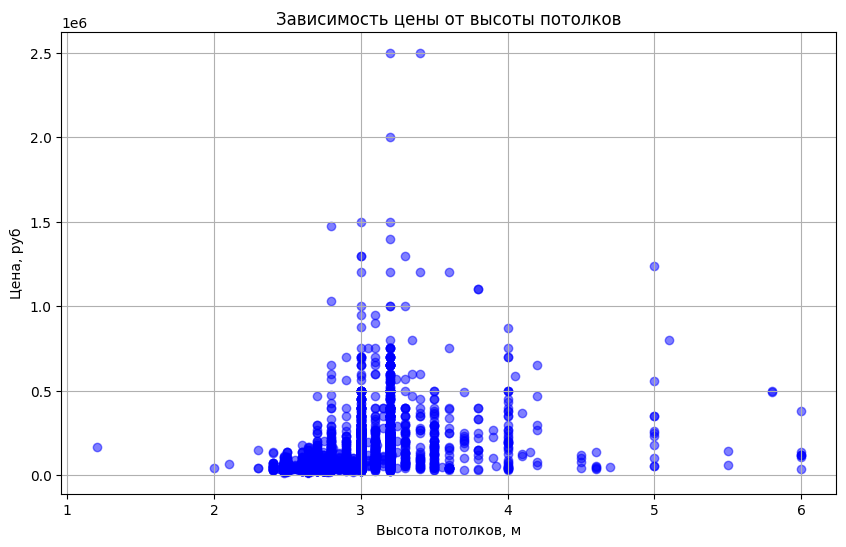

In [15]:
import matplotlib.pyplot as plt
d=cdata[cdata['ceiling_height']<9]
heights = d['ceiling_height']
prices = d['price']

# Построим график
plt.figure(figsize=(10, 6))
plt.scatter(heights, prices, alpha=0.5, color='blue')
plt.title('Зависимость цены от высоты потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Цена, руб')
plt.grid(True)
plt.show()

<Axes: xlabel='col_rooms', ylabel='price'>

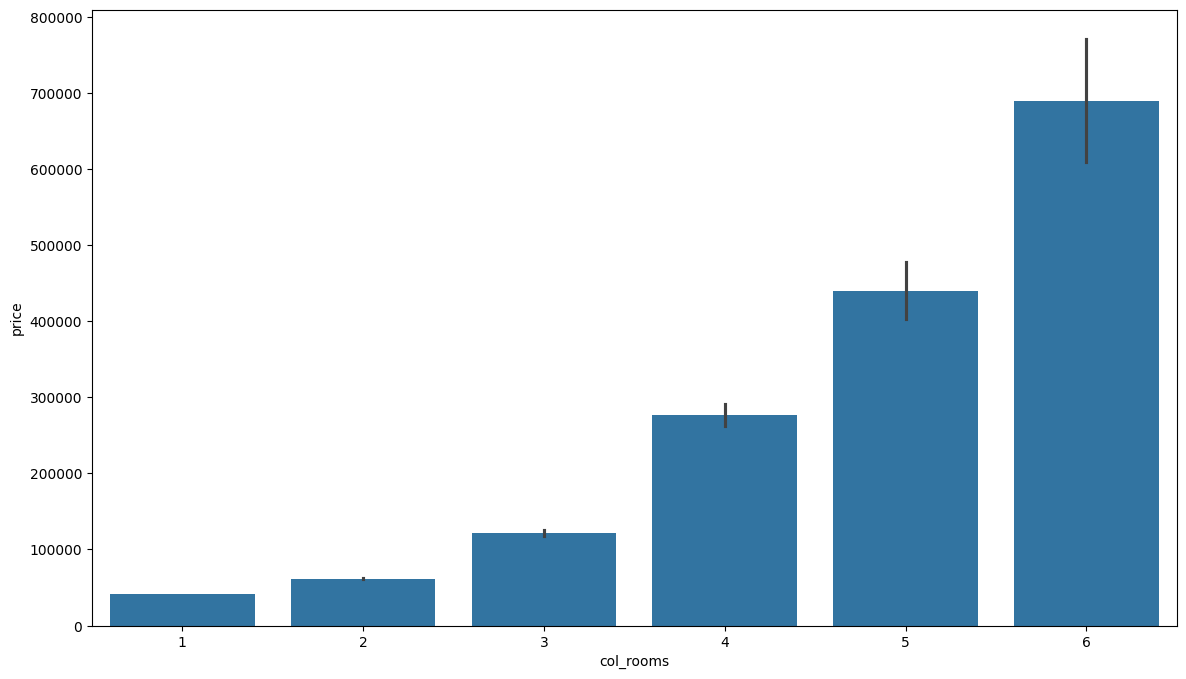

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(14,8))
cdata=cdata.sort_values('col_rooms')
sns.barplot(x=cdata['col_rooms'], y=cdata['price'])

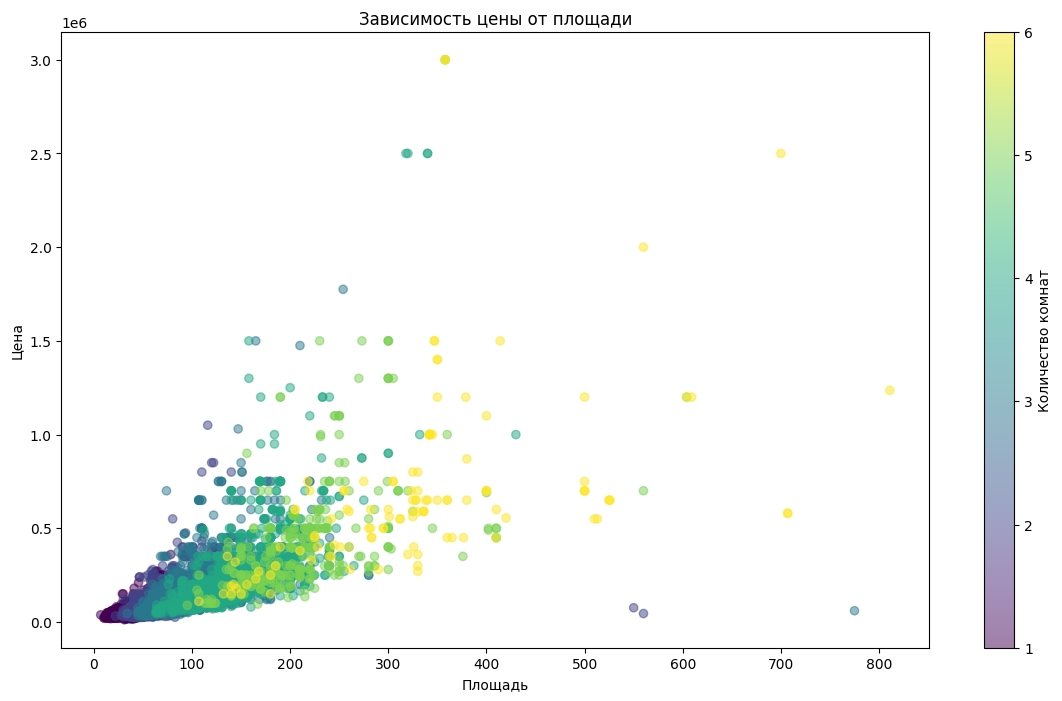

In [100]:
plt.subplots(figsize=(14,8))
plt.scatter(cdata['full_area'], cdata['price'], c=cdata['col_rooms'], cmap='viridis', alpha=0.5)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.colorbar(label='Количество комнат')
plt.show()

/tmp/ipykernel_5560/1145919870.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cdata['full_area'], cdata['price'], cmap='viridis', alpha=0.5)


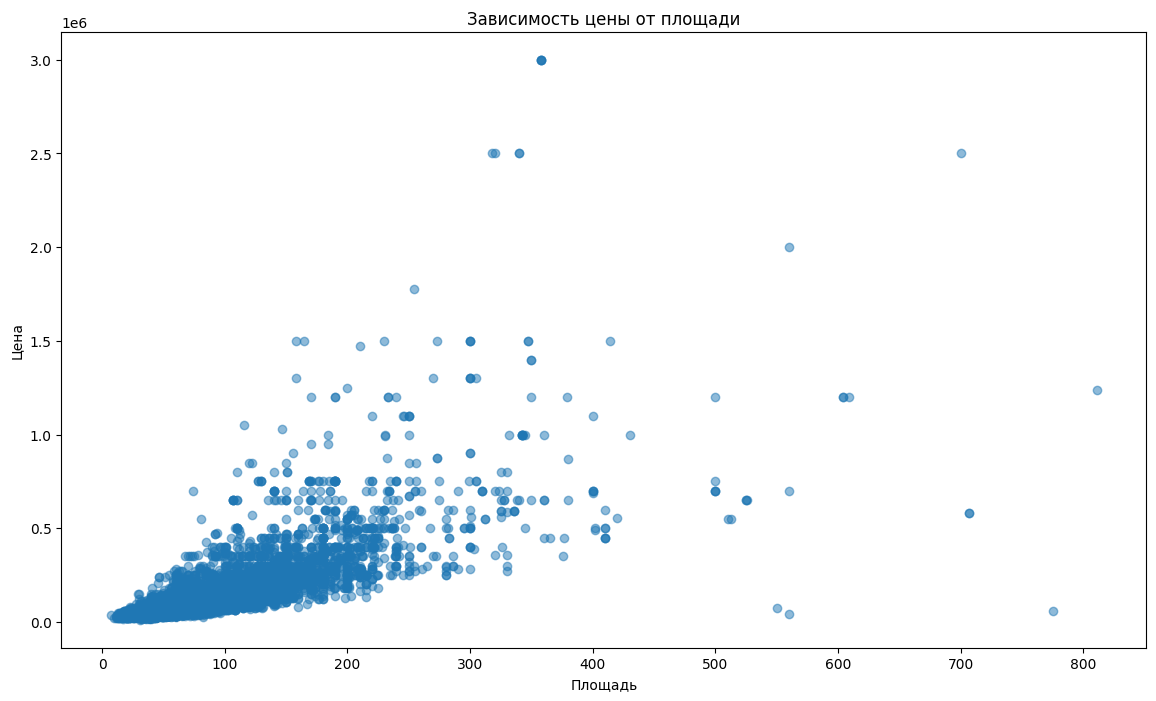

In [102]:
plt.subplots(figsize=(14,8))
plt.scatter(cdata['full_area'], cdata['price'], cmap='viridis', alpha=0.5)
plt.title('Зависимость цены от площади')
plt.xlabel('Площадь')
plt.ylabel('Цена')
plt.show()